In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy. stats import ttest_ind
import scipy. stats as stats
warnings. filterwarnings( 'ignore' )

In [6]:
conn=sqlite3.connect('inventory.db')
df=pd.read_sql_query("select * from vendor_sales_summary",conn)

In [7]:
df.head()

,index,VendorNumber,VendorName,Description,Brand,PurchasePrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,1233,26.27,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,3405,23.19,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,2,17035,PERNOD RICARD USA,Absolut 80 Proof,8068,18.24,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,4261,16.17,1750,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,3545,21.89,1750,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [8]:
df.drop(columns=['index'], inplace=True)


Exploratory Data Analysis

• Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be
included in the final analysis.
• In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns,
identify anomalies, and ensure data quality before proceeding with further analysis.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalExciseTax,10692.0,1.774226e+03,10975.582240,0.00,4.800000,46.570000,418.650000,3.682428e+05
FreightCost,10692.0,6.143376e+04,60938.458032,0.09,14069.870000,50293.620000,79528.990000,2.570321e+05


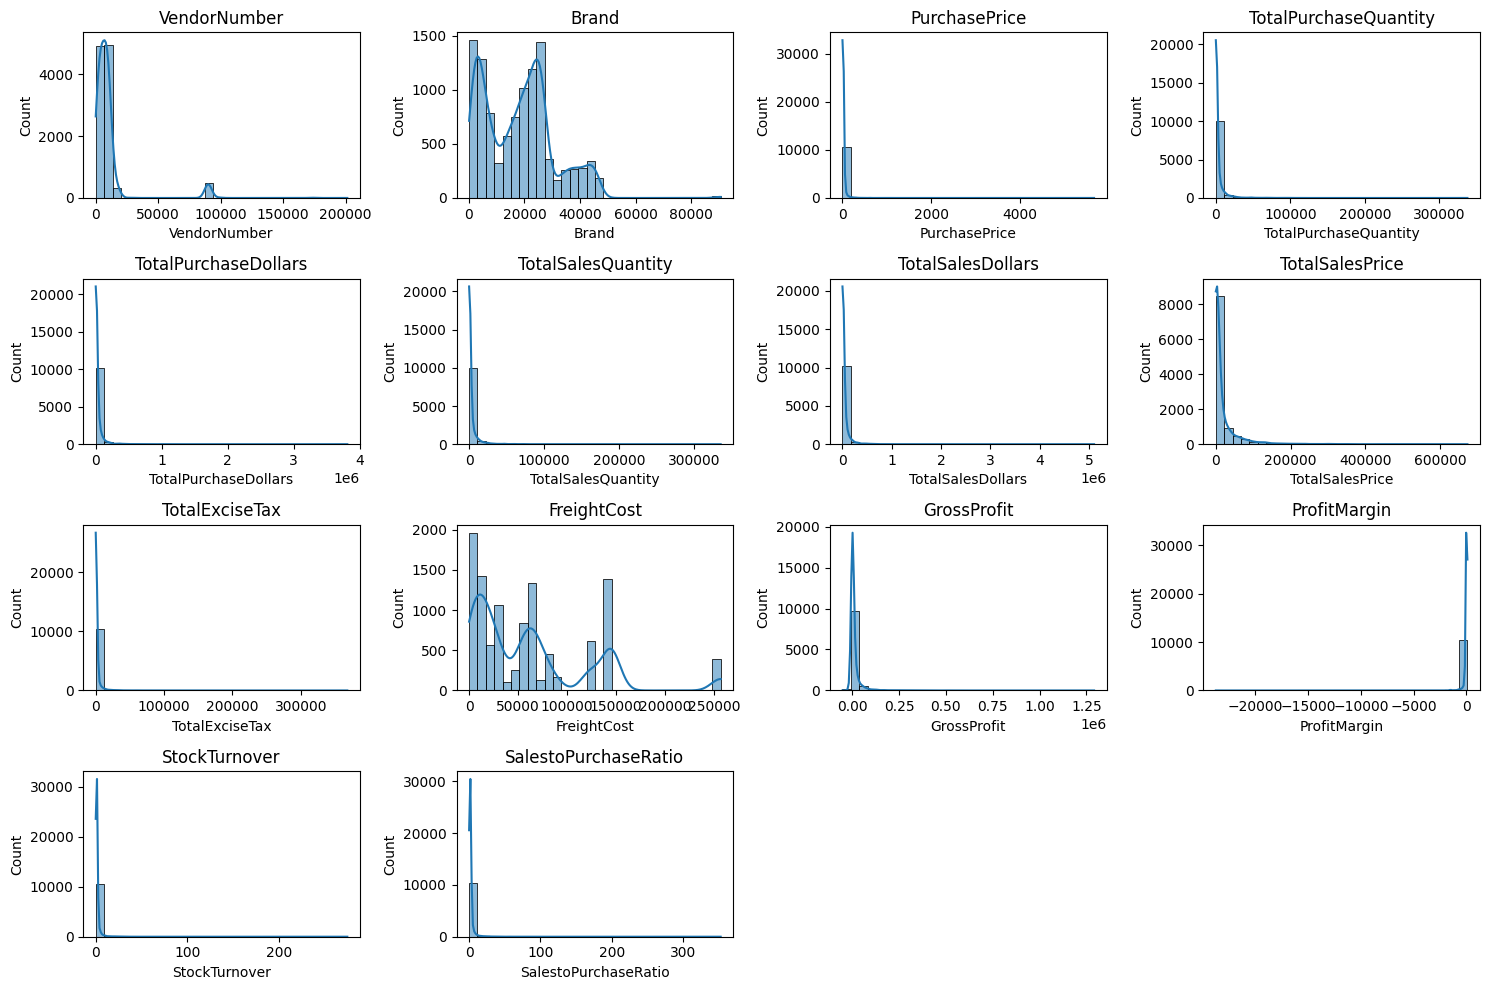

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df [col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

Can countplot be helpful ?

In [11]:
# # for outliers 

# numerical_cols = df.select_dtypes(include=np.number).columns
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numerical_cols):
#     plt.subplot(4, 4, i+1) # Adjust grid layout as needed
#     sns.boxplot(y=df [col])
#     plt.title(col)

# plt.tight_layout()
# plt.show()


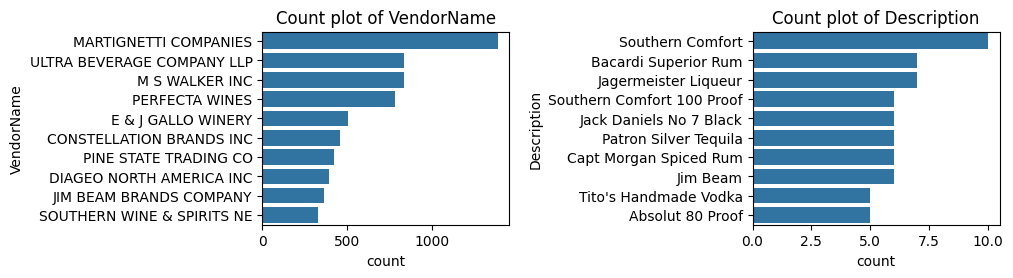

In [12]:
categorical_columns=['VendorName','Description']
plt.figure(figsize=(20,10))
for i , col in enumerate(categorical_columns):
    plt.subplot(4, 4, i+1) # Adjust grid layout as needed
    sns.countplot(y=df [col],order=df[col].value_counts().index[:10])

    plt.title(f"Count plot of {col}")

plt.tight_layout()
plt.show()


Analysis

In [13]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [14]:
brand_performance.columns

Index(['Description', 'TotalSalesDollars', 'ProfitMargin'], dtype='object')

In [15]:
low_sales_threshold = brand_performance[ 'TotalSalesDollars' ] .quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'] .quantile(0.85)

In [16]:
low_sales_threshold

np.float64(286.185)

In [17]:
high_margin_threshold

np.float64(56.198056057839054)

In [18]:
# Filter brands with low sales but high profit
target_brands= brand_performance[
(   brand_performance['TotalSalesDollars']<=low_sales_threshold ) &
(   brand_performance['ProfitMargin'] >= high_margin_threshold  )]
print ("Brands with Low Sales but High Profit Margins:" )
display(target_brands.sort_values('TotalSalesDollars'))


Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
7777,Santa Rita Organic Svgn Bl,9.99,66.466466
2896,Debauchery Pnt Nr,11.58,65.975820
2537,Concannon Glen Ellen Wh Zin,15.95,83.448276
2677,Crown Royal Apple,27.86,89.806174
7818,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
8939,Tommasi Poggio Tufo Cab Svgn,269.73,74.789604
9229,Vigne A Porrona Rosso,272.79,96.825397
3980,Gifft Chardonnay,279.80,94.245890
5736,Mad Dogs & Englishmen Jumil,279.80,97.666190


In [19]:
#brand_performance=brand_performance[brand_performance['TotalSalesDollars']<1000]0

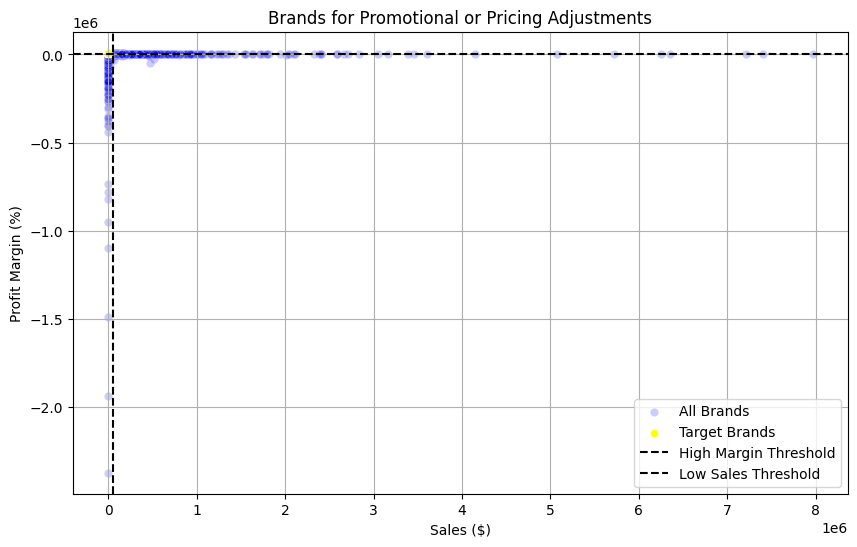

In [20]:

high_margin_threshold = 30
low_sales_threshold = 50000

plt.figure(figsize=(10,6))

brand_performance['ProfitMargin'] = brand_performance['ProfitMargin'] * 100
target_brands['ProfitMargin'] = target_brands['ProfitMargin'] * 100

sns.scatterplot(
    data=brand_performance,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="blue",
    alpha=0.2,
    label="All Brands"
)

# target brands
sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color="yellow",
    label="Target Brands"
)

plt.axhline(
    y=high_margin_threshold,
    linestyle='--',
    color='black',
    label="High Margin Threshold"
)
plt.axvline(
    x=low_sales_threshold,
    linestyle='--',
    color='black',
    label="Low Sales Threshold"
)
plt.xlabel("Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


VENDORS,BRANDS -> HIGHEST PERFORMANCE

In [21]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [22]:
top_vendors=df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands=df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)
top_vendors_formatted=top_vendors.apply(format_dollars)

top_vendors_df = top_vendors.reset_index()
top_vendors_df['FormattedSales'] = top_vendors_formatted.values

In [23]:
top_vendors_df

,VendorName,TotalSalesDollars,FormattedSales
0,DIAGEO NORTH AMERICA INC,68739834.97,68.74M
1,MARTIGNETTI COMPANIES,40960117.82,40.96M
2,PERNOD RICARD USA,32279544.17,32.28M
3,JIM BEAM BRANDS COMPANY,31898621.16,31.90M
4,BACARDI USA INC,25005365.79,25.01M
5,CONSTELLATION BRANDS INC,24467134.23,24.47M
6,E & J GALLO WINERY,18553774.66,18.55M
7,BROWN-FORMAN CORP,18476611.60,18.48M
8,ULTRA BEVERAGE COMPANY LLP,17802646.10,17.80M
9,M S WALKER INC,15436066.26,15.44M


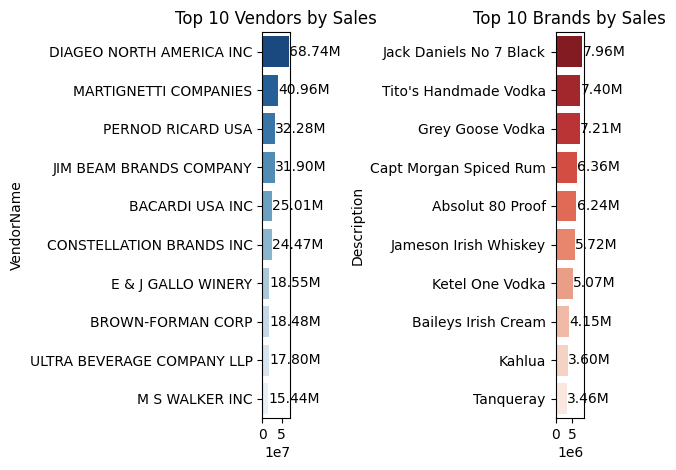

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

## LABELLING 
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

## TOP BRANDS 
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

## LABELLING
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()